# Intro

[Luminescent AI](https://luminescentai.com/) brings generative AI to photonics and RF. It empowers engineers to create complex optimal components just in a few lines of code! Specifically we created a GPU accelerated and automatic differentiation (AD) compatible FDTD package for simulation and inverse design of photonic integrated circuits (PIC), RF microstrip circuits, antennas and metasurfaces. Experimental release 🥼. Expect bugs 🐛🐞

[Follow us](https://www.linkedin.com/company/luminescent-ai/about) for updates and bug fixes!

# Links
[GitHub](https://github.com/paulxshen/Luminescent.jl): Star us :) We respond to issues within a day  
[LinkedIn](https://www.linkedin.com/company/luminescent-ai/about): Follow us for new features and bug fixes  
[Youtube](https://www.youtube.com/playlist?list=PLaK09N11V08geHeqyLJLDAW0tiDeJtnd4): Video tutorials  
[Company](luminescentai.com): Consulting, collaboration, funding, publication opportunities available  
[White Paper](https://docs.google.com/document/d/1b1kfDdRHw95AsR8zhrZYsHfCHLnULIO7uOYu8PxKQTM/edit?usp=sharing): Generative AI Cells for Semiconductor Photonics Design
Email: pxshen@alumni.stanford.edu info@luminescentai.com  
WhatsApp: 650-776-7724  
WeChat: pxshen1230 懂中文

# Installation
## Windows
1. [download]() & unzeip backend binaries. Add **where_you_unzipped**\LuminescentCompiled\bin to Path (using "edit environmental variables")
2. Install Anaconda distribution of Python . Inside  Anaconda Prompt do `pip install  luminescent`
## Linux
Please request

# Usage and conventions

We do simulation and generative inverse design supporting multi wavelength and multi mode in 3D or 2.5D. Currently, simulation runs on CPU or GPU but generative design is only on CPU. 

We lay out using Python  gdsfactory which is integrated with KLayout. Can also import .gds into gdsfactory . Internally, gdsfactory component and layer stack let generate a 3D mesh which is clipped vertically some depths above and below `core_layer`. By default,
we apply a SOI 220nm node (Si, SiN and Ge layers) implemented by [`gdsfactory.generic_tech`](https://gdsfactory.github.io/gdsfactory/notebooks/03_layer_stack.html#layerstack) layer stack. `luminescent.MATERIALS` maps the material tag of a layer in the layer stack to its property eg `MATERIALS["si"]["epsilon"]`. Can create your own LAYER_STACK and MATERIALS for your process node.

We automatically extend waveguides and adds margins but port locations remain fixed thus not affecting sparams.  Specify port pairs as eg "2,1" which is equivalent to `o2@0,o1@0` meaning optical_port_number@mode_number. 

Each simulation or design optimization run is saved to a folder inside working directory `wd="runs"` which can be passed as param in `write_sparams` or `gcell_problem`. Can access saved runs via `show_solution()`, `load_solution()`, `finetune()` which act on latest modified run folder inside `wd` if `name` not specified.  





# Generative AI inverse design
We introduce GCells (generative cells), a natural evolution of PCells (parametric cells) in semiconductor design . Given a set of inverse design objectives, a GCell will generate optimal geometry using adjoint optimization while ensuring manufacturability by enforcing minimum feature lengths.

In examples below, `gcells.mimo` (multi in multi out) is just a gdsfactory component with configurable waveguide ports, simple slab as pre-optimization geometry, and overlying rectangular design regions. Dimensions `l` along x and `w` along y. Ports are numbered incrementally: west (SW->NW) -> east (SE->NE) -> south (SW->SE) -> north (NW->NE). By default, they're spaced equally on a side. Example: `west=1, east=2` places port 1 on west, ports 2 & 3 on east. But can also individually specify their locations and widths. Example : `west=[1.0, 2.5], wwg_west=[0.5, 0.4]`.

`lmin` is minimum length scale . No fill or void features smaller than `lmin`.

`approx_2D=True` optimizes in 2.5D which is significantly faster than 3D. Examples done at low resolution and lax convergence for speed. For accuracy, the result must be finetuned in 3D at finer resolution, a feature that can be requested from Luminescent AI .


## Generative cells PDK for passive devices 


### 1x2 splitter MMI (tutorial)
1.55um wavelength 1x2 splitter. We set symmetry about y so only need to specify T21=1.0 as . Data saved to `name` folder inside working directory. We start 10 iteratiions of adjoint optimization.

In [1]:
from pprint import pprint
import luminescent as lumi

name="1x2_splitter"
c = lumi.gcells.mimo(west=1, east=2, l=3.0, w=3.0, wwg=.5, name=name)
targets = {"tparams":{1.55: {"2,1": 0.5}}}

prob = lumi.gcell_problem(
    c, targets, 
    symmetries=[1], lmin=0.15, dx=0.05, 
    approx_2D=True, iters=10)
sol = lumi.solve(prob)

2024-09-16 11:22:42.987 | WARNING  | kfactory.conf:_validate_layout_cache:254 - 'cell_layout_cache' has been set to True. This might cause when as any cell names generated automatically are loaded from the layout instead of created. This could happen e.g. after reading a gds file into the layout.

          using simulation folder runs\1x2_splitter
          started julia process
          compiling julia code...
          
setting up simulation...
using CPU backend.
starting optimization... first iter will be slow due to adjoint compilation.

(1) losses tparams: 0.8534799
weighted total loss 0.8534799
114.054817 seconds (37.95 M allocations: 28.017 GiB, 31.37% gc time, 23.28% compilation time)

(2) losses tparams: 0.83456576
weighted total loss 0.83456576
103.658104 seconds (21.75 M allocations: 27.001 GiB, 44.68% gc time, 0.00% compilation time)

(3) losses tparams: 0.82736427
weighted total loss 0.82736427
107.072454 seconds (21.75 M allocations: 27.001 GiB, 46.28% gc time, 0.00% co

C:\Users\pxshe\AppData\Roaming\Python\Python311\site-packages\luminescent\gplugins\luminescent\inverse_design.py:145: UserWarning: Setting `Unnamed_580_0_0.xmin` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_580_0_0.dxmin` instead.
  g.xmin = x0
C:\Users\pxshe\AppData\Roaming\Python\Python311\site-packages\luminescent\gplugins\luminescent\inverse_design.py:146: UserWarning: Setting `Unnamed_580_0_0.ymin` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_580_0_0.dymin` instead.
  g.ymin = y0


2024-09-16 11:48:38.955 | WARNING  | gdsfactory.component:__setattr__:185 - Setting `Unnamed_585_0_0.xmin` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_585_0_0.dxmin` instead. For further information, please consult the migration guide: 
2024-09-16 11:48:38.958 | WARNING  | gdsfactory.component:__setattr__:185 - Setting `Unnamed_585_0_0.ymin` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_585_0_0.dymin` instead. For further information, please consult the migration guide: 
2024-09-16 12:09:21.305 | WARNING  | gdsfactory.component:__setattr__:185 - Setting `Unnamed_590_0_0.xmin` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_590_0_0.dxmin` instead. For further information, please consult the migration guide: 
2024-09-16 12:09:21.307 | WARNING  | gdsfactory.component:__setattr__:185 - Setting `Unnamed_590_0_0.ymin` in um is deprecated and will change to DataBase

Can optionally optimize more using `finetune`

In [6]:
sol=lumi.finetune(iters=10)


          using simulation folder runs\1x2_splitter
          started julia process
          compiling julia code...
          
setting up simulation...
loading saved design...
using CPU backend.
starting optimization... first iter will be slow due to adjoint compilation.

(1) losses tparams: 0.012656808
weighted total loss 0.012656808
113.018300 seconds (37.95 M allocations: 28.016 GiB, 31.57% gc time, 23.22% compilation time)

(2) losses tparams: 0.039448738
weighted total loss 0.039448738
103.515021 seconds (21.75 M allocations: 27.001 GiB, 44.75% gc time, 0.00% compilation time)

(3) losses tparams: 0.0049768686
weighted total loss 0.0049768686
104.454850 seconds (21.75 M allocations: 27.001 GiB, 44.62% gc time, 0.00% compilation time)
Loss below threshold, stopping optimization.

saving checkpoint...
Done in 326.7810001373291 .
┌ Warning: Package cuDNN not found in current path.
│ - Run `import Pkg; Pkg.add("cuDNN")` to install the cuDNN package, then restart julia.
│ - If cuDNN

C:\Users\pxshe\AppData\Roaming\Python\Python311\site-packages\luminescent\gplugins\luminescent\inverse_design.py:145: UserWarning: Setting `Unnamed_605_0_0.xmin` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_605_0_0.dxmin` instead.
  g.xmin = x0
C:\Users\pxshe\AppData\Roaming\Python\Python311\site-packages\luminescent\gplugins\luminescent\inverse_design.py:146: UserWarning: Setting `Unnamed_605_0_0.ymin` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_605_0_0.dymin` instead.
  g.ymin = y0


showing solution from runs\1x2_splitter
loading solution from runs\1x2_splitter
Converting an image file to a GDS file..
width:60
height:60
{'path': 'runs\\1x2_splitter',
 'sparams': {'1.55': {'o1@0,o1@0': (-0.11187193+0.055640522j),
                      'o2@0,o1@0': (0.38312262-0.59222347j)}},
 'tparams': {'1.55': {'o1@0,o1@0': 0.015611196, 'o2@0,o1@0': 0.49751157}}}


C:\Users\pxshe\AppData\Roaming\Python\Python311\site-packages\luminescent\gplugins\luminescent\inverse_design.py:145: UserWarning: Setting `Unnamed_610_0_0.xmin` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_610_0_0.dxmin` instead.
  g.xmin = x0
C:\Users\pxshe\AppData\Roaming\Python\Python311\site-packages\luminescent\gplugins\luminescent\inverse_design.py:146: UserWarning: Setting `Unnamed_610_0_0.ymin` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_610_0_0.dymin` instead.
  g.ymin = y0


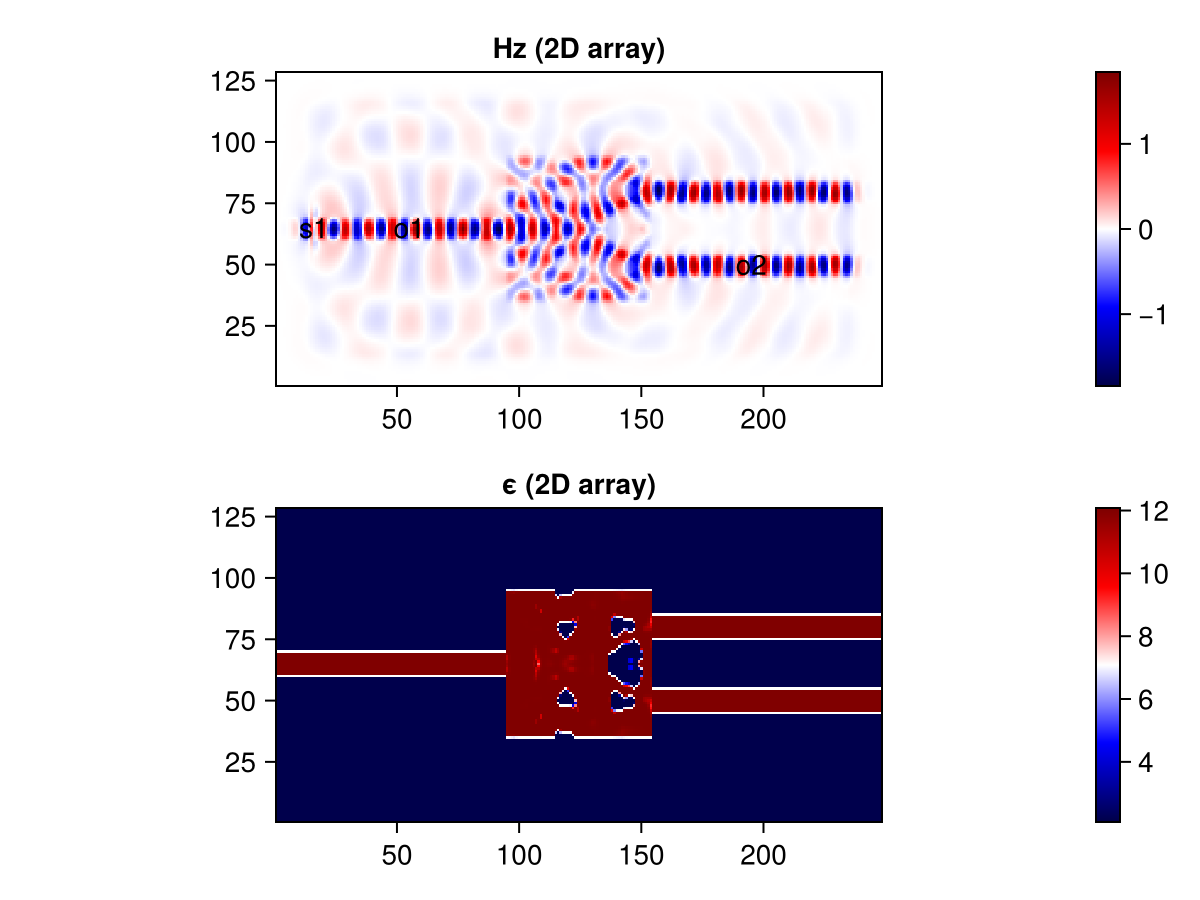

In [7]:
# pprint(sol["tparams"])
lumi.show_solution(name=name)

Can get optimized gdsfactory component, also saved as `optimized_component.gds` in run folder. Can also find `design_region_1.gds` and `design_region_1.png` for just the optimized design regions.

loading solution from runs\1x2_splitter
Converting an image file to a GDS file..
width:60
height:60


C:\Users\pxshe\AppData\Roaming\Python\Python311\site-packages\luminescent\gplugins\luminescent\inverse_design.py:145: UserWarning: Setting `Unnamed_630_0_0.xmin` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_630_0_0.dxmin` instead.
  g.xmin = x0
C:\Users\pxshe\AppData\Roaming\Python\Python311\site-packages\luminescent\gplugins\luminescent\inverse_design.py:146: UserWarning: Setting `Unnamed_630_0_0.ymin` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_630_0_0.dymin` instead.
  g.ymin = y0


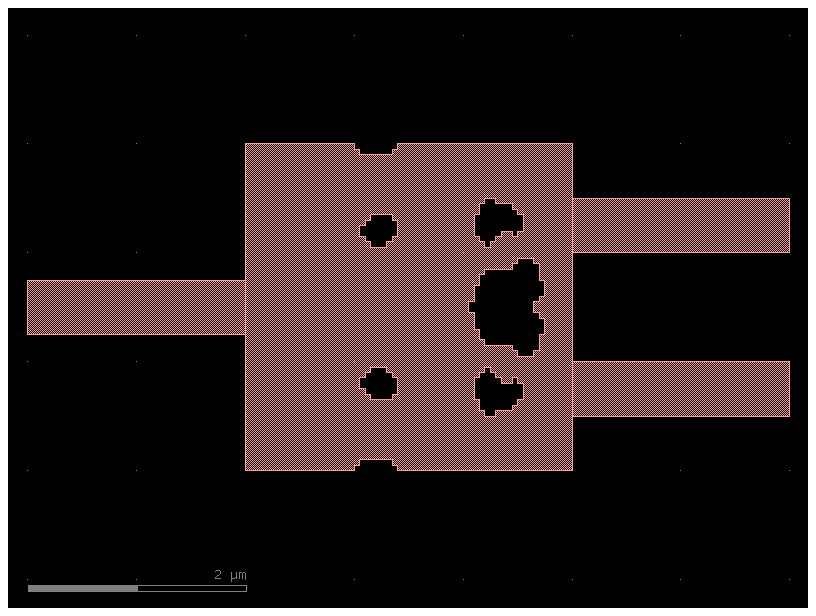

In [12]:
sol=lumi.load_solution()
c_opt=sol["optimized_component"]
c_opt.plot()

### 1x4 splitter MMI
Need same phase on outputs. Because of symmetry, only need 0.0 phase difference between first 2 outputs.

In [13]:
from pprint import pprint
import luminescent as lumi

name="1x4_splitter"
c = lumi.gcells.mimo(west=1, east=4, l=6.0, w=6.0, wwg=.5, name=name)
targets = {
    "tparams":{1.55: {"2,1": 0.25, "3,1":0.25}},
    "phasediff":{1.55: {"2,3": 0.0}},
    }

prob = lumi.gcell_problem(
    c, targets, 
    symmetries=[1], lmin=0.15, dx=0.05, 
    approx_2D=True, iters=40)
sol = lumi.solve(prob)


          using simulation folder runs\1x4_splitter
          started julia process
          compiling julia code...
          
setting up simulation...
using CPU backend.
starting optimization... first iter will be slow due to adjoint compilation.

(1) losses phasediff: 0.50657505 tparams: 0.6013638
weighted total loss 1.1079388
235.101205 seconds (54.04 M allocations: 66.519 GiB, 34.28% gc time, 15.97% compilation time)

(2) losses phasediff: 0.28351548 tparams: 0.6640502
weighted total loss 0.9475657
257.427222 seconds (29.09 M allocations: 64.945 GiB, 46.11% gc time, 0.00% compilation time)

(3) losses phasediff: 0.09306166 tparams: 0.72743714
weighted total loss 0.8204988
245.999913 seconds (29.09 M allocations: 64.945 GiB, 48.22% gc time, 0.00% compilation time)

(4) losses phasediff: 0.9963419 tparams: 0.83508444
weighted total loss 1.8314264
3742.707319 seconds (29.09 M allocations: 64.945 GiB, 96.49% gc time, 0.00% compilation time)

(5) losses phasediff: 0.9319925 tparams: 

C:\Users\pxshe\AppData\Roaming\Python\Python311\site-packages\luminescent\gplugins\luminescent\inverse_design.py:145: UserWarning: Setting `Unnamed_1450_0_0.xmin` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_1450_0_0.dxmin` instead.
  g.xmin = x0
C:\Users\pxshe\AppData\Roaming\Python\Python311\site-packages\luminescent\gplugins\luminescent\inverse_design.py:146: UserWarning: Setting `Unnamed_1450_0_0.ymin` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_1450_0_0.dymin` instead.
  g.ymin = y0


showing solution from runs\1x4_splitter
loading solution from runs\1x4_splitter
Converting an image file to a GDS file..
width:120
height:120


C:\Users\pxshe\AppData\Roaming\Python\Python311\site-packages\luminescent\gplugins\luminescent\inverse_design.py:145: UserWarning: Setting `Unnamed_1455_0_0.xmin` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_1455_0_0.dxmin` instead.
  g.xmin = x0
C:\Users\pxshe\AppData\Roaming\Python\Python311\site-packages\luminescent\gplugins\luminescent\inverse_design.py:146: UserWarning: Setting `Unnamed_1455_0_0.ymin` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_1455_0_0.dymin` instead.
  g.ymin = y0


{'path': 'runs\\1x4_splitter',
 'sparams': {'1.55': {'o1@0,o1@0': (0.052164108+0.13167973j),
                      'o2@0,o1@0': (0.45253593-0.20694555j),
                      'o3@0,o1@0': (0.45188817-0.21967511j)}},
 'tparams': {'1.55': {'o1@0,o1@0': 0.020060645,
                      'o2@0,o1@0': 0.24761522,
                      'o3@0,o1@0': 0.25246006}}}


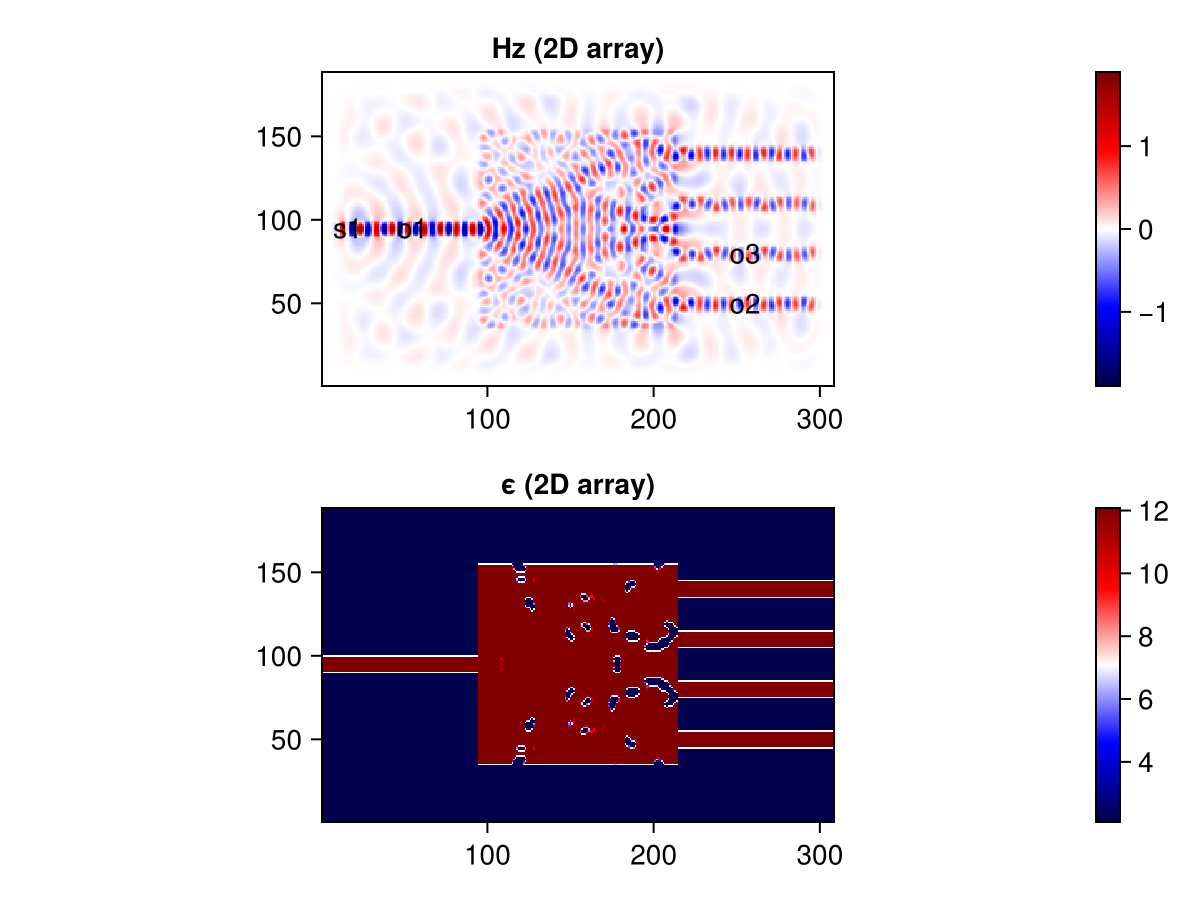

In [15]:
# finetune(iters=10,name=name)
lumi.show_solution()

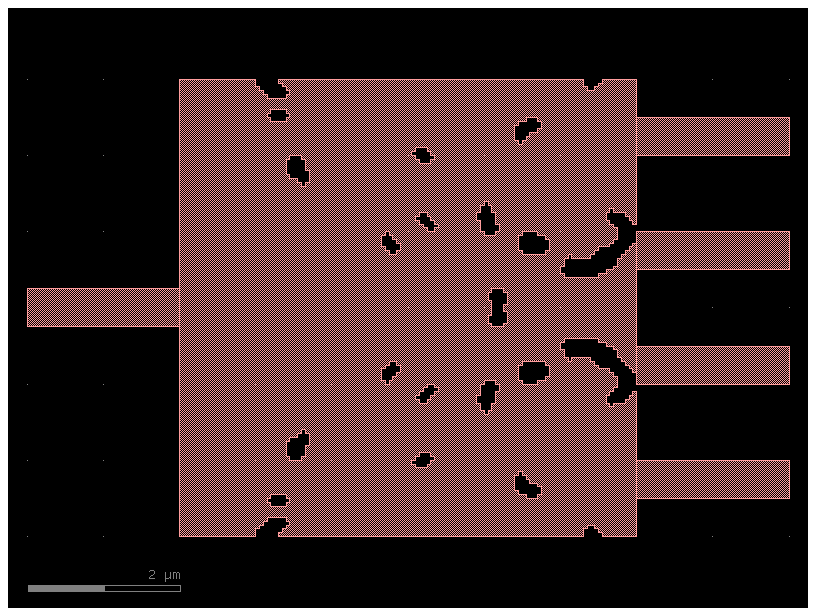

In [14]:
c_opt=sol["optimized_component"]
c_opt.plot()

### wavelength domain demultiplexer

In [ ]:
from pprint import pprint
import luminescent as lumi

c = lumi.gcells.mimo(west=1, east=2, l=6.0, w=4.0, wwg=.5, name="demux")
targets = {"tparams":{
    1.55: {"2,1": 1.0},
    1.20: {"3,1": 1.0},
}}

prob = lumi.gcell_problem(
    c, targets,
    lmin=0.15, dx=0.05, 
    approx_2D=True, iters=50)
sol = lumi.solve(prob)


          using simulation folder runs\demux
          started julia process
          compiling julia code...
          
setting up simulation...
using CPU backend.
starting optimization... first iter will be slow due to adjoint compilation.

(1) losses tparams: 0.8823161
weighted total loss 0.8823161
952.803661 seconds (99.54 M allocations: 112.178 GiB, 42.27% gc time, 6.55% compilation time)

(2) losses tparams: 0.80781657
weighted total loss 0.80781657
1041.561213 seconds (67.54 M allocations: 110.198 GiB, 48.15% gc time, 0.00% compilation time)

(3) losses tparams: 0.71352935
weighted total loss 0.71352935


In [ ]:
lumi.show_solution()

### mode converter
"o2@1,o1@0" means converting optical port 1 mode 0 to optical port 2 mode 1.

In [1]:
from pprint import pprint
import luminescent as lumi

c = lumi.gcells.mimo(west=1, east=1, l=3.0, w=3.0, wwg=.5, name="mode_converter")
targets = {"tparams":{1.55: {"o2@1,o1@0": 1.0}}}

prob = lumi.gcell_problem(
    c, targets,
    lmin=0.15, dx=0.05, 
    approx_2D=True, iters=40)
sol = lumi.solve(prob)

2024-09-17 10:06:11.347 | WARNING  | kfactory.conf:_validate_layout_cache:254 - 'cell_layout_cache' has been set to True. This might cause when as any cell names generated automatically are loaded from the layout instead of created. This could happen e.g. after reading a gds file into the layout.

          using simulation folder runs\mode_converter
          started julia process
          compiling julia code...
          
setting up simulation...
┌ Warning: Package cuDNN not found in current path.
│ - Run `import Pkg; Pkg.add("cuDNN")` to install the cuDNN package, then restart julia.
│ - If cuDNN is not installed, some Flux functionalities will not be available when running on the GPU.
└ @ FluxCUDAExt C:\Users\pxshe\.julia\packages\Flux\HBF2N\ext\FluxCUDAExt\FluxCUDAExt.jl:57
BoundsError: attempt to access 1-element Vector{Any} at index [2]

images and results saved in runs\mode_converter
loading solution from runs\mode_converter


FileNotFoundError: [Errno 2] No such file or directory: 'runs\\mode_converter\\sol.json'

In [ ]:
lumi.show_solution()

### symmetric crossing 

In [ ]:
from pprint import pprint
import luminescent as lumi

c = lumi.gcells.mimo(west=1, east=1, south=1, north=1, l=4.0, w=4.0, wwg=.5, name="crossing")
targets = {"tparams":{1.55: {"2,1": 1.0}}}

prob = lumi.gcell_problem(
    c, targets,
    lmin=0.15, dx=0.05, symmetries=[0,"diag"],
    approx_2D=True, iters=40)
sol = lumi.solve(prob)

In [ ]:
lumi.show_solution()

## GCells PDK for active  devices

### Thermo-optic phase shifters 
Please request 

## GCells PDK for nonlinear devices
Please request 

# S-parameters simulation (3D on GPU)

One can choose to do only a subset of sparams in case of symmetric devices by specifying `keys`. if `keys` omitted, all sparams will be calculated


## SOI 220nm

### straight Si waveguide 

In [ ]:
import luminescent as lumi
from luminescent import MATERIALS
from gdsfactory.generic_tech import LAYER,LAYER_STACK
import gdsfactory as gf
import pprint as pp

wg = gf.components.straight(1.0,width=0.5,layer=LAYER.WG)
wg.plot()

#### TE0

In [ ]:
c=gf.Component(name="wg_TE0")
c<<wg
sol = lumi.write_sparams(c, wavelength=1.55, keys=["2,1"], # same as keys=["o2@0,o1@0"]
                      core_layer=LAYER.WG,   bbox_layer=LAYER.WAFER, # defaults
                         layer_stack=LAYER_STACK, materials=MATERIALS, # defaults
     dx=0.05, approx_2D=False, dtype="float32", gpu="CUDA",) # or gpu=None
lumi.show_solution()

#### TE1

In [ ]:
c=gf.Component(name="wg_TE1")
c<<wg
sol = lumi.write_sparams(c, wavelengths=[1.55], keys=["o2@1,o1@1"],
     dx=0.05, approx_2D=False, dtype="float32", gpu="CUDA",) # or gpu=None
lumi.show_solution()

#### TE0 multiple wavelengths

In [ ]:
c=gf.Component(name="wg_multi")
c<<wg
sol = lumi.write_sparams(c, wavelengths=[1.25, 1.55], keys=["2,1"],
     dx=0.05, approx_2D=False, dtype="float32", gpu="CUDA",) # or gpu=None
# sol = lumi.load_solution()
lumi.show_solution()

### Si rib waveguide
only need to modify bbox_layer to include 90nm bottom silicon slab

In [ ]:
c=gf.Component(name="wg_rib")
c<<wg
sol = lumi.write_sparams(c, wavelengths=[1.55], keys=["2,1"], # same as keys=["o2@0,o1@0"]
                      core_layer=LAYER.WG,   bbox_layer=[LAYER.WAFER,LAYER.SLAB90],
     dx=0.05, approx_2D=False, dtype="float32", gpu="CUDA",) # or gpu=None
# sol = lumi.load_solution()
lumi.show_solution()

### SiN strip waveguide

In [ ]:
import luminescent as lumi
from luminescent import MATERIALS
from gdsfactory.generic_tech import LAYER,LAYER_STACK
import gdsfactory as gf

wg = gf.components.straight(length=1.5,width=1.0,layer=LAYER.WGN)
c=gf.Component(name="wg_SiN")
c<<wg
sol = lumi.write_sparams(c, wavelengths=[1.55], keys=["2,1"], # same as keys=["o2@0,o1@0"]
                      core_layer=LAYER.WGN,   bbox_layer=LAYER.WAFER, # defaults
     dx=0.05, approx_2D=False, dtype="float32", gpu="CUDA",) # or gpu=None
# sol = lumi.load_solution()
lumi.show_solution()

# Advanced features
Following can be requested from info@luminescentai.com (mention your position and organization ):
- 3generativese desiGPU
- non-CUDA GPU